## Support Vector Machine (SVM) Classifier

In [85]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics

In [86]:
# Load iris dataset for classification
iris = datasets.load_iris()

In [87]:
X, y = iris.data[:, :2], iris.target  # use only the first two features for visualization

In [88]:
X.shape, y.shape

((150, 2), (150,))

In [89]:
# split the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
# Standardize features (mean=0 and variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
# Define SVM classifiers with different kernels
svm_models = {
    "Linear SVM": svm.SVC(kernel="linear", C=1),
    "Polynomial SVM": svm.SVC(kernel="poly", degree=3, C=1),
    "RBF SVM": svm.SVC(kernel="rbf", C=1, gamma="scale"),
    "Sigmoid SVM": svm.SVC(kernel="sigmoid", C=1)
}

In [92]:
# Train & evaluate models
for name, model in svm_models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict the test set

    print(f"\nModel: {name}")
    print(metrics.classification_report(y_test, y_pred))
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(f"Support Vectors: {model.support_vectors_.shape[0]}")
    print("=" * 70)



Model: Linear SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45

Accuracy: 73.33%
Support Vectors: 56

Model: Polynomial SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.55      0.85      0.67        13
           2       0.67      0.31      0.42        13

    accuracy                           0.76        45
   macro avg       0.74      0.72      0.70        45
weighted avg       0.77      0.76      0.74        45

Accuracy: 75.56%
Support Vectors: 68

Model: RBF SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        

----------------------------------------
## Visualization of decision boundaries

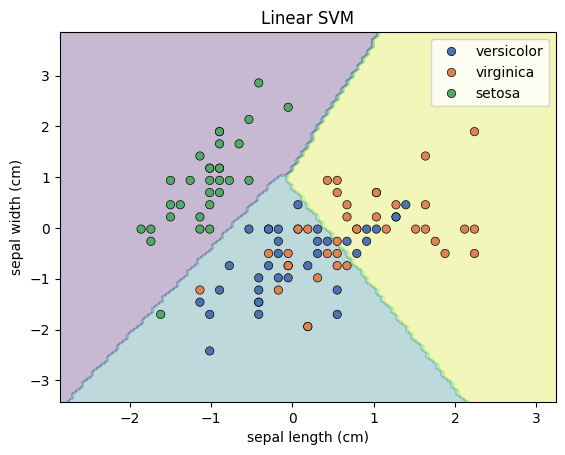

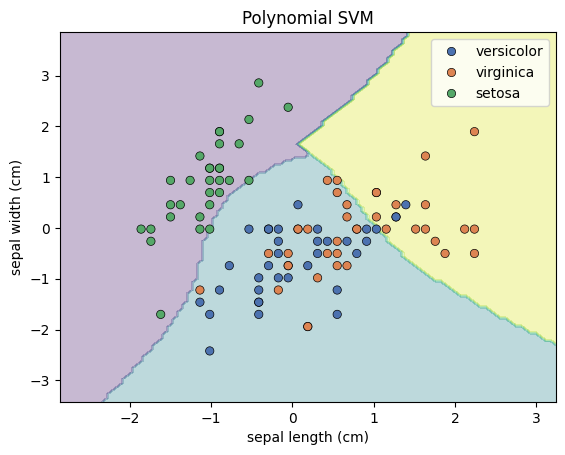

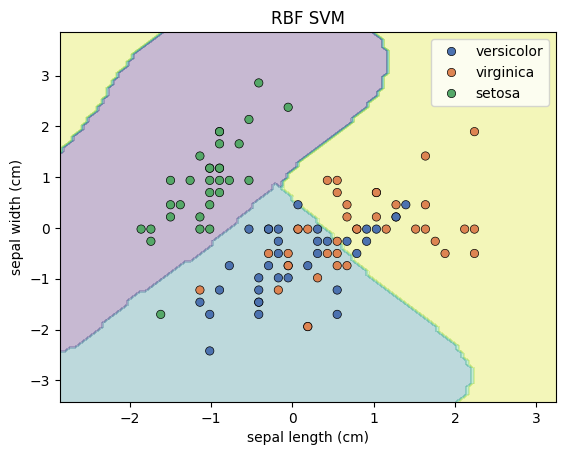

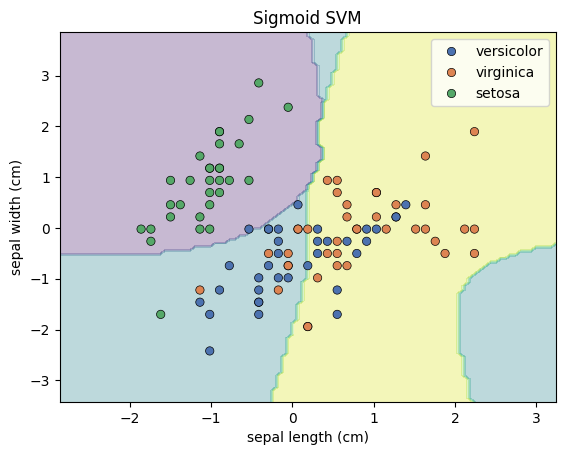

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

# Plot decision boundaries
for name, model in svm_models.items():
    # Use built-in sklearn DecisionBoundaryDisplay
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X_train,
        response_method="predict",
        alpha=0.3
    )
    
    # Scatter plot of data points
    sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=iris.target_names[y_train],
        palette="deep",
        edgecolor="k"
    )

    plt.title(name)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()